# Importing Required Library

In [93]:
# Importing helpful pacakages to load in

import numpy as np   # linear algebra
import pandas as pd   # data processing, CSV file I/O

#For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# Until fuction: line seperator
def print_dashes_and_ln():
    print('-'*100, '\n')
    
# Formatter to display all float format in 2 decimal format
pd.options.display.float_format = '{:.2f}'.format

# Loading data from csv file

In [94]:
# loading the loan data

rawchurn = pd.read_csv('telecom_churn_data.csv' , sep = ',',engine = 'python')

# 1. Data Understanding

In [95]:
# Snapshot of Chrun Data
print(rawchurn.head(10)); print_dashes_and_ln();
print(rawchurn.shape); print_dashes_and_ln();
print('This dataset has ' + str(rawchurn.shape[0]) + ' rows, and ' + str(rawchurn.shape[1]) + ' columns'); print_dashes_and_ln();

   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   
5     7000286308        109            0.00            0.00            0.00   
6     7001051193        109            0.00            0.00            0.00   
7     7000701601        109            0.00            0.00            0.00   
8     7001524846        109            0.00            0.00            0.00   
9     7001864400        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/20

In [96]:
rawchurn.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [ ]:
rawchurn.describe(include = 'all')

# 2. Data Manipulation

We have to create id columns, date columns, category columns and numeric columns to understand the data better

In [ ]:
id_columns = ['mobile_number', 'circle_id']

date_columns = [
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9'  
              ]

category_columns = [
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9',
             'night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9'             
                  ]

numeric_columns = [column for column in rawchurn.columns if column not in id_columns + date_columns + category_columns]


In [ ]:
# print the number of columns in each list
print(("id_Columns:{}").format(len(id_columns))); print_dashes_and_ln();
print(("date_columns:{}").format(len(date_columns))); print_dashes_and_ln();
print(("category_columns:{}").format(len(category_columns))); print_dashes_and_ln();
print(("numeric_columns:{}").format(len(numeric_columns))); print_dashes_and_ln();

In [ ]:
print(("Total no. of Columns:{}").format(len(id_columns) +len(date_columns) + len(category_columns) + len(numeric_columns)))

we have taken care of the classification of all the variables that are present in churn data sets. Now we will check for missing values.

In [ ]:
# There is 99999 rows and 226 columns. There are many columns which Contain NaN. Lets identify those columns and get rid of them
rawchurn.isna().sum()

In [ ]:
# We will first check all the recharge columns
recharge_columns = [
                  'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                  'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                  'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'
                 ]

rawchurn[recharge_columns].describe(include='all')

In [ ]:
# we can see that minimun value of mostly columns is zero and some cases it is one so we can replace the missing value with zero. It means that users has not recharged at all.

rawchurn[recharge_columns] = rawchurn[recharge_columns].apply(lambda x: x.fillna(0))


In [ ]:
# Checking there is no missing values present
rawchurn[recharge_columns].isna().sum()

In [ ]:
# Now we will drop date and id columns
print("Shape before dropping: ", rawchurn.shape); print_dashes_and_ln();
rawchurn = rawchurn.drop(id_columns + date_columns, axis=1)
print("Shape after dropping: ", rawchurn.shape); print_dashes_and_ln();

In [14]:
# For categorical columns, we will replace missing values with some thing and we will call this as new category. Lets choose -1.
rawchurn[category_columns] = rawchurn[category_columns].apply(lambda x: x.fillna(-1))

In [15]:
# Checking there is no missing values present
rawchurn[category_columns].isna().sum()

fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
dtype: int64

In [16]:
# We will now drop variables which has more than 70% missing data

initial_columns = rawchurn.shape[1]

THRESHOLD = 0.7

include_columns = list(rawchurn.apply(lambda column: True if column.isnull().sum()/rawchurn.shape[0] < THRESHOLD else False))

drop_missing = pd.DataFrame({'features':rawchurn.columns , 'include': include_columns})
drop_missing.loc[drop_missing.include == True,:]

features  include
0        loc_og_t2o_mou     True
1        std_og_t2o_mou     True
2        loc_ic_t2o_mou     True
3                arpu_6     True
4                arpu_7     True
5                arpu_8     True
6                arpu_9     True
7           onnet_mou_6     True
8           onnet_mou_7     True
9           onnet_mou_8     True
10          onnet_mou_9     True
11         offnet_mou_6     True
12         offnet_mou_7     True
13         offnet_mou_8     True
14         offnet_mou_9     True
15        roam_ic_mou_6     True
16        roam_ic_mou_7     True
17        roam_ic_mou_8     True
18        roam_ic_mou_9     True
19        roam_og_mou_6     True
20        roam_og_mou_7     True
21        roam_og_mou_8     True
22        roam_og_mou_9     True
23     loc_og_t2t_mou_6     True
24     loc_og_t2t_mou_7     True
25     loc_og_t2t_mou_8     True
26     loc_og_t2t_mou_9     True
27     loc_og_t2m_mou_6     True
28     loc_og_t2m_mou_7     True
29     loc_og_t2m_mou_8     True
30     loc_og_t2m_mou_9     True
31     loc_og_t2f_mou_6     True
32     loc_og_t2f_mou_7     True
33     loc_og_t2f_mou_8     True
34     loc_og_t2f_mou_9     True
35     loc_og_t2c_mou_6     True
36     loc_og_t2c_mou_7     True
37     loc_og_t2c_mou_8     True
38     loc_og_t2c_mou_9     True
39         loc_og_mou_6     True
40         loc_og_mou_7     True
41         loc_og_mou_8     True
42         loc_og_mou_9     True
43     std_og_t2t_mou_6     True
44     std_og_t2t_mou_7     True
45     std_og_t2t_mou_8     True
46     std_og_t2t_mou_9     True
47     std_og_t2m_mou_6     True
48     std_og_t2m_mou_7     True
49     std_og_t2m_mou_8     True
50     std_og_t2m_mou_9     True
51     std_og_t2f_mou_6     True
52     std_og_t2f_mou_7     True
53     std_og_t2f_mou_8     True
54     std_og_t2f_mou_9     True
55     std_og_t2c_mou_6     True
56     std_og_t2c_mou_7     True
57     std_og_t2c_mou_8     True
58     std_og_t2c_mou_9     True
59         std_og_mou_6     True
60         std_og_mou_7     True
61         std_og_mou_8     True
62         std_og_mou_9     True
63         isd_og_mou_6     True
64         isd_og_mou_7     True
65         isd_og_mou_8     True
66         isd_og_mou_9     True
67         spl_og_mou_6     True
68         spl_og_mou_7     True
69         spl_og_mou_8     True
70         spl_og_mou_9     True
71          og_others_6     True
72          og_others_7     True
73          og_others_8     True
74          og_others_9     True
75       total_og_mou_6     True
76       total_og_mou_7     True
77       total_og_mou_8     True
78       total_og_mou_9     True
79     loc_ic_t2t_mou_6     True
80     loc_ic_t2t_mou_7     True
81     loc_ic_t2t_mou_8     True
82     loc_ic_t2t_mou_9     True
83     loc_ic_t2m_mou_6     True
84     loc_ic_t2m_mou_7     True
85     loc_ic_t2m_mou_8     True
86     loc_ic_t2m_mou_9     True
87     loc_ic_t2f_mou_6     True
88     loc_ic_t2f_mou_7     True
89     loc_ic_t2f_mou_8     True
90     loc_ic_t2f_mou_9     True
91         loc_ic_mou_6     True
92         loc_ic_mou_7     True
93         loc_ic_mou_8     True
94         loc_ic_mou_9     True
95     std_ic_t2t_mou_6     True
96     std_ic_t2t_mou_7     True
97     std_ic_t2t_mou_8     True
98     std_ic_t2t_mou_9     True
99     std_ic_t2m_mou_6     True
100    std_ic_t2m_mou_7     True
101    std_ic_t2m_mou_8     True
102    std_ic_t2m_mou_9     True
103    std_ic_t2f_mou_6     True
104    std_ic_t2f_mou_7     True
105    std_ic_t2f_mou_8     True
106    std_ic_t2f_mou_9     True
107    std_ic_t2o_mou_6     True
108    std_ic_t2o_mou_7     True
109    std_ic_t2o_mou_8     True
110    std_ic_t2o_mou_9     True
111        std_ic_mou_6     True
112        std_ic_mou_7     True
113        std_ic_mou_8     True
114        std_ic_mou_9     True
115      total_ic_mou_6     True
116      total_ic_mou_7     True
117      total_ic_mou_8     True
118      total_ic_mou_9     True
119        spl_ic_mou_6     True
120        spl_ic_mou_

In [17]:
# dropping the columns now
rawchurn = rawchurn.loc[:, include_columns]

dropped_cols = rawchurn.shape[1] - initial_columns
print("columns dropped.{0}".format(dropped_cols)); print_dashes_and_ln();

columns dropped.-16
---------------------------------------------------------------------------------------------------- 



In [18]:
rawchurn.isna().sum()

loc_og_t2o_mou        1018
std_og_t2o_mou        1018
loc_ic_t2o_mou        1018
arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6           3937
onnet_mou_7           3859
onnet_mou_8           5378
onnet_mou_9           7745
offnet_mou_6          3937
offnet_mou_7          3859
offnet_mou_8          5378
offnet_mou_9          7745
roam_ic_mou_6         3937
roam_ic_mou_7         3859
roam_ic_mou_8         5378
roam_ic_mou_9         7745
roam_og_mou_6         3937
roam_og_mou_7         3859
roam_og_mou_8         5378
roam_og_mou_9         7745
loc_og_t2t_mou_6      3937
loc_og_t2t_mou_7      3859
loc_og_t2t_mou_8      5378
loc_og_t2t_mou_9      7745
loc_og_t2m_mou_6      3937
loc_og_t2m_mou_7      3859
loc_og_t2m_mou_8      5378
loc_og_t2m_mou_9      7745
loc_og_t2f_mou_6      3937
loc_og_t2f_mou_7      3859
loc_og_t2f_mou_8      5378
loc_og_t2f_mou_9      7745
loc_og_t2c_mou_6      3937
loc_og_t2c_mou_7      3859
l

In [19]:
# Filling all NA's with Zero for Now
rawchurn.fillna(0, inplace=True)
sum(rawchurn.isnull().sum()>0)

0

# 3. Data Preparation

In [20]:
# Function to Return Monthwise Columns List. Returns arrays of columns belonging to 6,7,8,9 month separately.
# Also returns an array of columns that are not month specific as common columns.

def returnColumnsByMonth(df):
    column_Month_6 = []
    column_Month_7 = []
    column_Month_8 = []
    column_Month_9 = []
    column_Common = []
    for eachColumns in df.columns:
        if((eachColumns.find("_6") >=0) | (eachColumns.find("jun_") >=0)):
            column_Month_6.append(eachColumns)
        elif((eachColumns.find("_7") >=0) | (eachColumns.find("jul_") >=0)):
            column_Month_7.append(eachColumns)
        elif((eachColumns.find("_8") >= 0) | (eachColumns.find("aug_") >=0)):
            column_Month_8.append(eachColumns)
        elif((eachColumns.find("_9") >=0) | (eachColumns.find("sep_") >=0)):
            column_Month_9.append(eachColumns)
        else:
            column_Common.append(eachColumns)
    return column_Month_6, column_Month_7, column_Month_8, column_Month_9, column_Common

In [21]:
# Get Columns Monthwise & Basic Understanding of Columns
column_Month_6, column_Month_7, column_Month_8, column_Month_9, column_Common = returnColumnsByMonth(rawchurn)

print("Month 6 Columns Count ==> {}".format(len(column_Month_6)))
print("Month 7 Columns Count ==> {}".format(len(column_Month_7)))
print("Month 8 Columns Count ==> {}".format(len(column_Month_8)))
print("Month 9 Columns Count ==> {}".format(len(column_Month_9)))
print("Common Columns Count ==> {}".format(len(column_Common)))

Month 6 Columns Count ==> 48
Month 7 Columns Count ==> 48
Month 8 Columns Count ==> 48
Month 9 Columns Count ==> 48
Common Columns Count ==> 4


In [22]:
# All Months are having same type of columns So lets see the columns in general
print ("\nMonth based Columns:\n \t\t==> {}".format(np.array(column_Month_6)))
print ("\nCommon Columns:\n \t\t==> {}".format(np.array(column_Common)))


Month based Columns:
 		==> ['arpu_6' 'onnet_mou_6' 'offnet_mou_6' 'roam_ic_mou_6' 'roam_og_mou_6'
 'loc_og_t2t_mou_6' 'loc_og_t2m_mou_6' 'loc_og_t2f_mou_6'
 'loc_og_t2c_mou_6' 'loc_og_mou_6' 'std_og_t2t_mou_6' 'std_og_t2m_mou_6'
 'std_og_t2f_mou_6' 'std_og_t2c_mou_6' 'std_og_mou_6' 'isd_og_mou_6'
 'spl_og_mou_6' 'og_others_6' 'total_og_mou_6' 'loc_ic_t2t_mou_6'
 'loc_ic_t2m_mou_6' 'loc_ic_t2f_mou_6' 'loc_ic_mou_6' 'std_ic_t2t_mou_6'
 'std_ic_t2m_mou_6' 'std_ic_t2f_mou_6' 'std_ic_t2o_mou_6' 'std_ic_mou_6'
 'total_ic_mou_6' 'spl_ic_mou_6' 'isd_ic_mou_6' 'ic_others_6'
 'total_rech_num_6' 'total_rech_amt_6' 'max_rech_amt_6'
 'last_day_rch_amt_6' 'total_rech_data_6' 'max_rech_data_6'
 'av_rech_amt_data_6' 'vol_2g_mb_6' 'vol_3g_mb_6' 'night_pck_user_6'
 'monthly_2g_6' 'sachet_2g_6' 'monthly_3g_6' 'sachet_3g_6' 'fb_user_6'
 'jun_vbc_3g']

Common Columns:
 		==> ['loc_og_t2o_mou' 'std_og_t2o_mou' 'loc_ic_t2o_mou' 'aon']


In [23]:
# Derive Columns Total_Recharge_Amount from 6th and 7th Month total_rech_amt
rawchurn['Total_Recharge_Amount'] = rawchurn['total_rech_amt_6'] + rawchurn['total_rech_amt_7']

# As per Upgrad guideline, we have to look at 70th percentile of the average recharge amount in the first two months (the good phase)
print(rawchurn['Total_Recharge_Amount'].describe(percentiles = [0.7])); print_dashes_and_ln();
print("\n70% of Total Recharge Amount of first 2 months are {}".format(rawchurn['Total_Recharge_Amount'].describe(percentiles = [0.7])[5])); print_dashes_and_ln();

count   99999.00
mean      650.48
std       741.67
min         0.00
50%       458.00
70%       737.00
max     75525.00
Name: Total_Recharge_Amount, dtype: float64
---------------------------------------------------------------------------------------------------- 


70% of Total Recharge Amount of first 2 months are 737.0
---------------------------------------------------------------------------------------------------- 



In [24]:
# Filter High Value Customer with more than or equal to 70th percentile amount
rawchurn = rawchurn[rawchurn['Total_Recharge_Amount'] > 737].reset_index(drop=True)
print("\nTotal High Value Customer Count ==> {}".format(rawchurn.shape)); print_dashes_and_ln();
rawchurn.drop(columns=['Total_Recharge_Amount'], inplace=True)


Total High Value Customer Count ==> (29979, 197)
---------------------------------------------------------------------------------------------------- 



In [25]:
# Tag churners and remove attributes of the churn phase
# calculate total incoming and outgoing minutes of usage
rawchurn['total_calls_mou_9'] = rawchurn.total_ic_mou_9 + rawchurn.total_og_mou_9
rawchurn['total_internet_usage_9'] =  rawchurn.vol_2g_mb_9 + rawchurn.vol_3g_mb_9

In [26]:
# tag the churned customers (churn=1, else 0)
rawchurn['churn'] = rawchurn.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_usage_9 == 0) else 0, axis=1)

In [27]:
# delete derived variables
rawchurn = rawchurn.drop(['total_calls_mou_9', 'total_internet_usage_9'], axis=1)

In [28]:
# change data type to category
rawchurn.churn = rawchurn.churn.astype("category")

# print churn ratio
print("Churn Ratio:"); print_dashes_and_ln();
print(rawchurn.churn.value_counts()*100/rawchurn.shape[0]); print_dashes_and_ln();

Churn Ratio:
---------------------------------------------------------------------------------------------------- 

0   91.36
1    8.64
Name: churn, dtype: float64
---------------------------------------------------------------------------------------------------- 



# Churn is 8.64% which indicates an unbalanced datasets.

In [29]:
# Remove columns with '9'
rawchurn = rawchurn.filter(regex='[^9]$', axis=1)
rawchurn.shape

(29979, 150)

In [30]:
# extract all names that end with 9
col_9_names = rawchurn.filter(regex='9$', axis=1).columns

# update numeric_columns and category_columns list
category_columns = [col for col in category_columns if col not in col_9_names]
category_columns.append('churn')
numeric_columns = [col for col in rawchurn.columns if col not in category_columns]

In [31]:
# Lets look also at difference between the 8th month and the previous months

rawchurn['arpu_diff'] = rawchurn.arpu_8 - ((rawchurn.arpu_6 + rawchurn.arpu_7)/2)

rawchurn['onnet_mou_diff'] = rawchurn.onnet_mou_8 - ((rawchurn.onnet_mou_6 + rawchurn.onnet_mou_7)/2)

rawchurn['offnet_mou_diff'] = rawchurn.offnet_mou_8 - ((rawchurn.offnet_mou_6 + rawchurn.offnet_mou_7)/2)

rawchurn['roam_ic_mou_diff'] = rawchurn.roam_ic_mou_8 - ((rawchurn.roam_ic_mou_6 + rawchurn.roam_ic_mou_7)/2)

rawchurn['roam_og_mou_diff'] = rawchurn.roam_og_mou_8 - ((rawchurn.roam_og_mou_6 + rawchurn.roam_og_mou_7)/2)

rawchurn['loc_og_mou_diff'] = rawchurn.loc_og_mou_8 - ((rawchurn.loc_og_mou_6 + rawchurn.loc_og_mou_7)/2)

rawchurn['std_og_mou_diff'] = rawchurn.std_og_mou_8 - ((rawchurn.std_og_mou_6 + rawchurn.std_og_mou_7)/2)

rawchurn['isd_og_mou_diff'] = rawchurn.isd_og_mou_8 - ((rawchurn.isd_og_mou_6 + rawchurn.isd_og_mou_7)/2)

rawchurn['spl_og_mou_diff'] = rawchurn.spl_og_mou_8 - ((rawchurn.spl_og_mou_6 + rawchurn.spl_og_mou_7)/2)

rawchurn['total_og_mou_diff'] = rawchurn.total_og_mou_8 - ((rawchurn.total_og_mou_6 + rawchurn.total_og_mou_7)/2)

rawchurn['loc_ic_mou_diff'] = rawchurn.loc_ic_mou_8 - ((rawchurn.loc_ic_mou_6 + rawchurn.loc_ic_mou_7)/2)

rawchurn['std_ic_mou_diff'] = rawchurn.std_ic_mou_8 - ((rawchurn.std_ic_mou_6 + rawchurn.std_ic_mou_7)/2)

rawchurn['isd_ic_mou_diff'] = rawchurn.isd_ic_mou_8 - ((rawchurn.isd_ic_mou_6 + rawchurn.isd_ic_mou_7)/2)

rawchurn['spl_ic_mou_diff'] = rawchurn.spl_ic_mou_8 - ((rawchurn.spl_ic_mou_6 + rawchurn.spl_ic_mou_7)/2)

rawchurn['total_ic_mou_diff'] = rawchurn.total_ic_mou_8 - ((rawchurn.total_ic_mou_6 + rawchurn.total_ic_mou_7)/2)

rawchurn['total_rech_num_diff'] = rawchurn.total_rech_num_8 - ((rawchurn.total_rech_num_6 + rawchurn.total_rech_num_7)/2)

rawchurn['total_rech_amt_diff'] = rawchurn.total_rech_amt_8 - ((rawchurn.total_rech_amt_6 + rawchurn.total_rech_amt_7)/2)

rawchurn['max_rech_amt_diff'] = rawchurn.max_rech_amt_8 - ((rawchurn.max_rech_amt_6 + rawchurn.max_rech_amt_7)/2)

rawchurn['total_rech_data_diff'] = rawchurn.total_rech_data_8 - ((rawchurn.total_rech_data_6 + rawchurn.total_rech_data_7)/2)

rawchurn['max_rech_data_diff'] = rawchurn.max_rech_data_8 - ((rawchurn.max_rech_data_6 + rawchurn.max_rech_data_7)/2)

rawchurn['av_rech_amt_data_diff'] = rawchurn.av_rech_amt_data_8 - ((rawchurn.av_rech_amt_data_6 + rawchurn.av_rech_amt_data_7)/2)

rawchurn['vol_2g_mb_diff'] = rawchurn.vol_2g_mb_8 - ((rawchurn.vol_2g_mb_6 + rawchurn.vol_2g_mb_7)/2)

rawchurn['vol_3g_mb_diff'] = rawchurn.vol_3g_mb_8 - ((rawchurn.vol_3g_mb_6 + rawchurn.vol_3g_mb_7)/2)


# Visualise Data

In [32]:
# change columns types
category_columns1 = [
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
                  ]
rawchurn[numeric_columns] = rawchurn[numeric_columns].apply(pd.to_numeric)
rawchurn[category_columns1] = rawchurn[category_columns1].apply(lambda column: column.astype("category"), axis=0)

In [33]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

# EDA For all the features

count   29979.00
mean      587.59
std       442.85
min     -2258.71
25%       364.35
50%       495.95
75%       704.18
max     27731.09
Name: arpu_6, dtype: float64


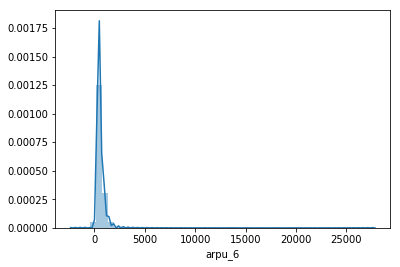

In [34]:
univariate(rawchurn.arpu_6)

count   29979.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: loc_og_t2o_mou, dtype: float64


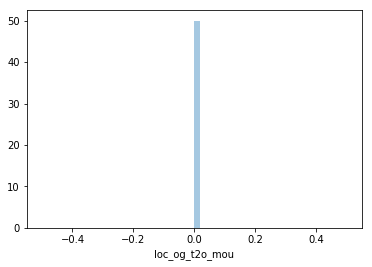

In [35]:
univariate(rawchurn.loc_og_t2o_mou)

count   29979.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: std_og_t2o_mou, dtype: float64


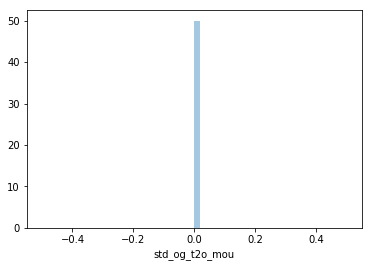

In [36]:
univariate(rawchurn.std_og_t2o_mou)

count   29979.00
mean      267.81
std       466.75
min         0.00
25%        27.07
50%        99.59
75%       298.22
max     10752.56
Name: onnet_mou_8, dtype: float64


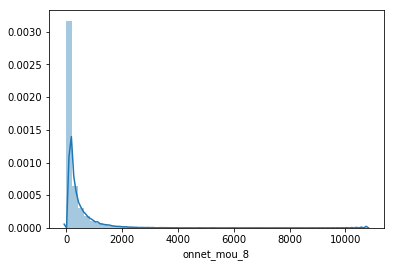

In [37]:
univariate(rawchurn.onnet_mou_8)

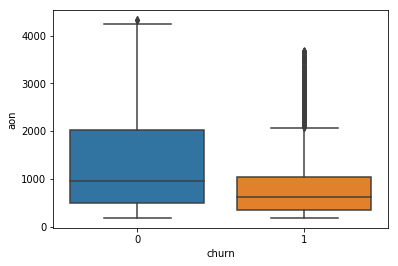

In [38]:
# Bivariate EDA
bivariate(rawchurn.churn, rawchurn.aon)

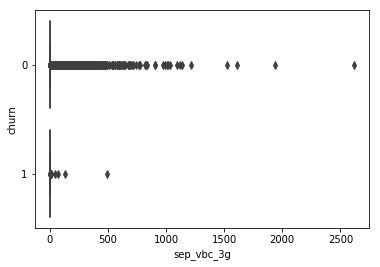

In [39]:
bivariate(rawchurn.sep_vbc_3g, rawchurn.churn)

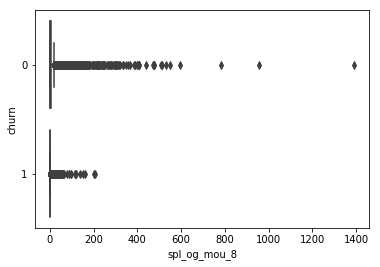

In [40]:
bivariate(rawchurn.spl_og_mou_8, rawchurn.churn)

In [41]:
pd.crosstab(rawchurn.churn, rawchurn.night_pck_user_8, normalize='columns')*100

night_pck_user_8  -1.00  0.00   1.00 
churn                                
0                 87.71  97.03  97.13
1                 12.29   2.97   2.87

In [42]:
pd.crosstab(rawchurn.churn, rawchurn.sachet_3g_8)

sachet_3g_8     0     1    2    3   4   5   6   7   8   9   10  11  12  13  \
churn                                                                        
0            25710  1025  249  124  71  64  26  23  20  12  10   6  11   9   
1             2542    31    3    5   2   2   0   0   2   0   0   0   0   1   

sachet_3g_8  14  15  16  17  18  19  20  21  23  25  27  29  30  38  41  
churn                                                                    
0             6   5   2   2   2   1   2   2   2   1   1   1   1   1   1  
1             0   0   1   0   0   0   0   0   0   0   0   0   0   0   0

[Text(0, 0, 'Not-Churn'), Text(0, 0, 'Churn')]

Text(0, 0.5, 'Average Age in Network')

Text(0.5, 1.0, 'Average Age in Network between Churn and Not-Churn subscriber')

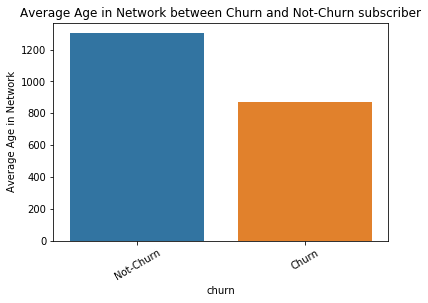

In [43]:
X1 = rawchurn.groupby('churn')['aon'].agg(['mean']).reset_index()
p = sns.barplot(x='churn', y='mean', data=X1)
p.set_xticklabels(['Not-Churn', 'Churn'],rotation=30)
p.set_ylabel('Average Age in Network')
plt.title('Average Age in Network between Churn and Not-Churn subscriber')
plt.show()

Churn subscriber is having less average AON than Non-Churn Subscriber. Hence subsribers which has high AON has less chances of Churn

In [44]:
# Capping the outliers with k-sigma technique
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array
rawchurn[numeric_columns] = rawchurn[numeric_columns].apply(cap_outliers, axis=0)

Correlation matrix

<Figure size 2880x1440 with 0 Axes>

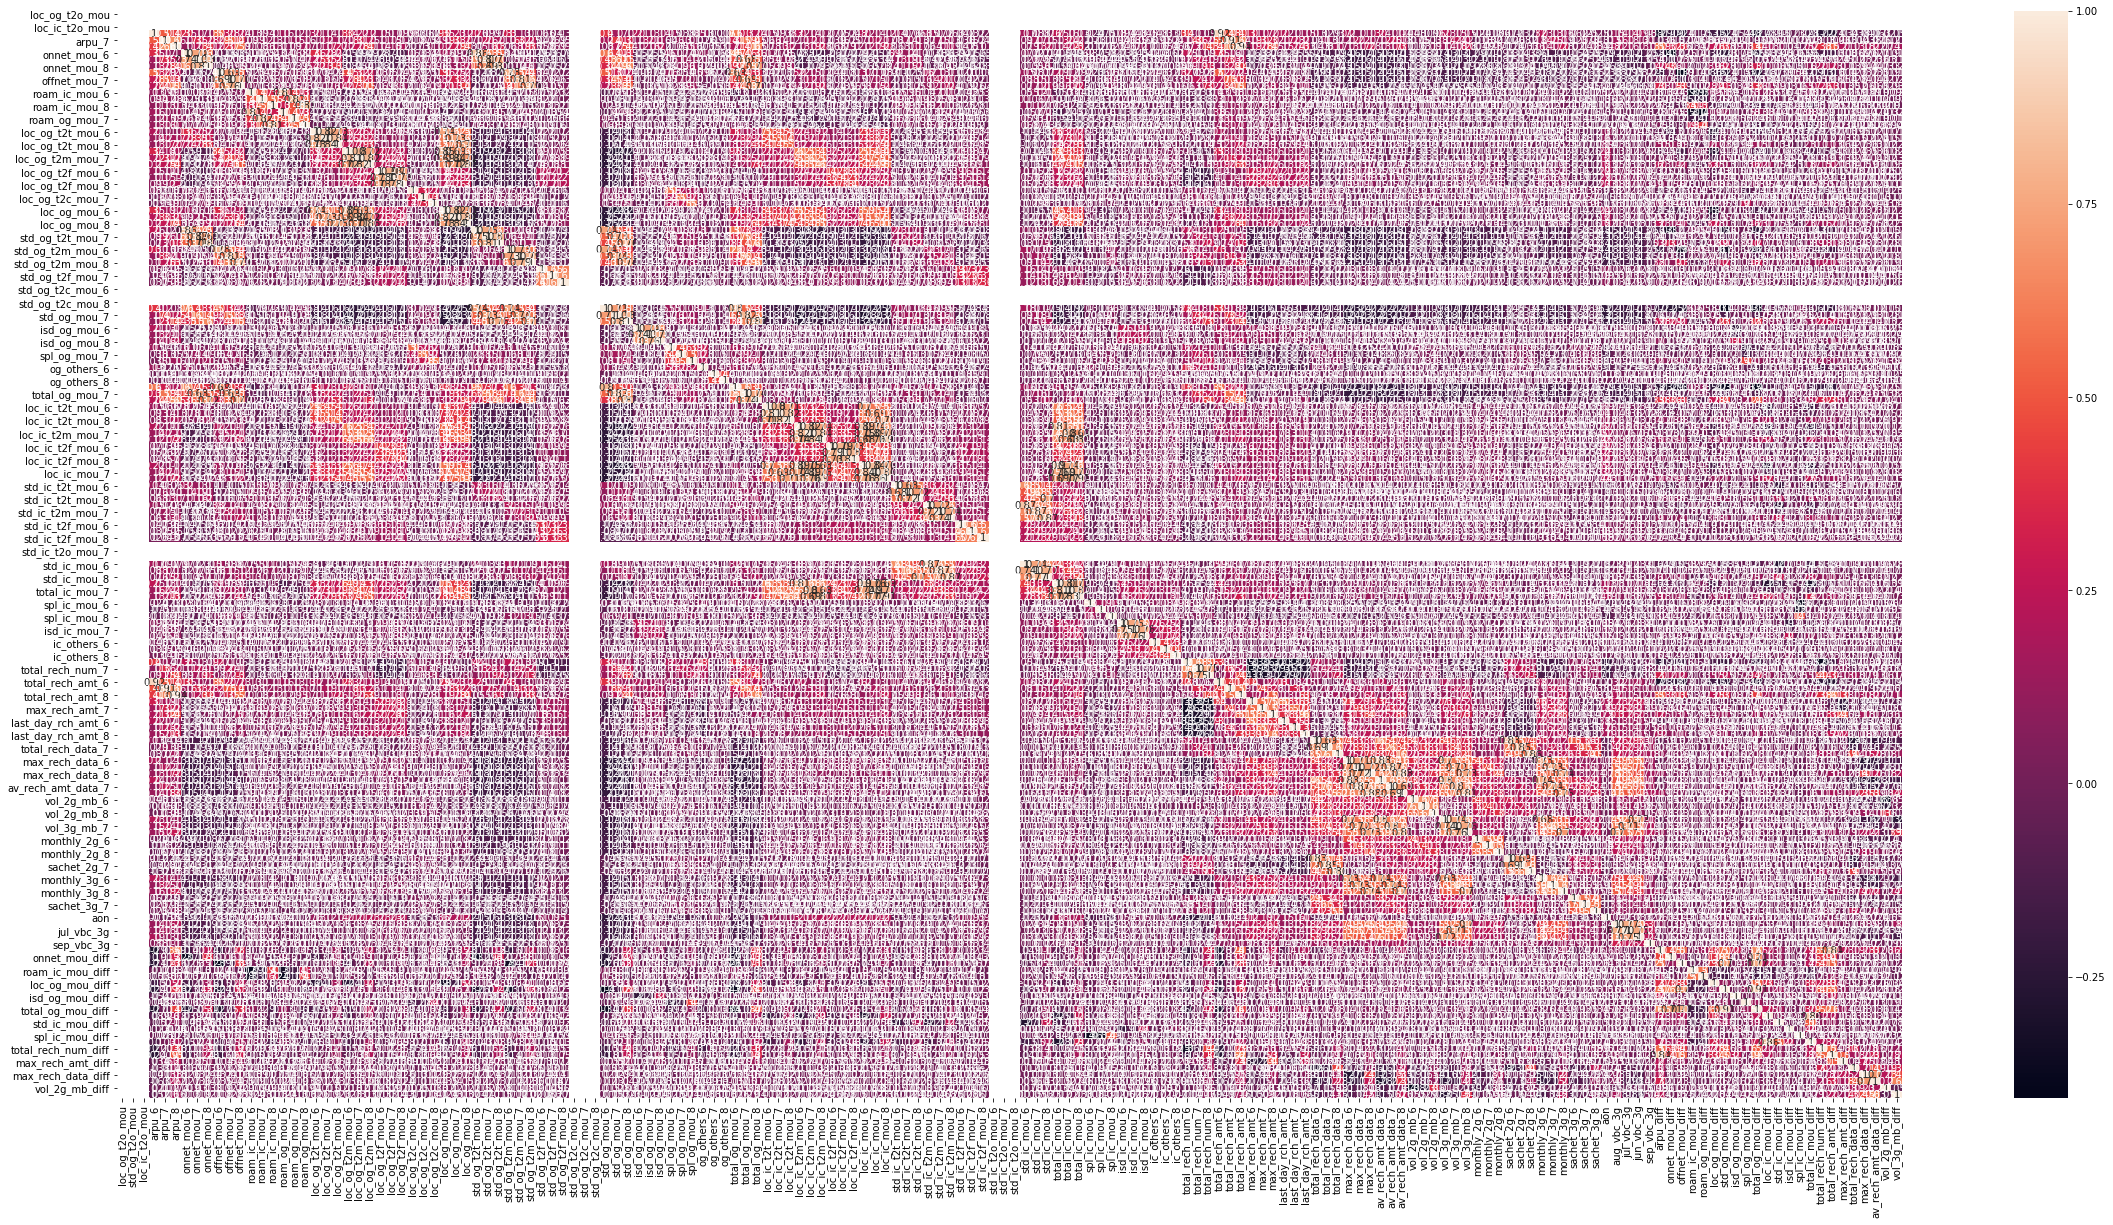

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (40,20))      
sns.heatmap(rawchurn.corr(),annot = True)

 Due to a large number of variables, we cannot visualize the correlation matrix properly. We will address this after PCA.

# Data Modelling


# # Data standardization and preparation

In [46]:
# Importing important libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics

In [47]:
# Converting Churn datatype into numeric
rawchurn['churn'] = pd.to_numeric(rawchurn['churn'])

In [48]:
# divide data into train and test
X = rawchurn.drop("churn", axis = 1)
y = rawchurn.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100, stratify = y)

In [49]:
# print no.of features and shapes of train and test sets
print("Number of Features ==> {}".format(len(X.columns))); print_dashes_and_ln();
X_train.shape
y_train.shape
X_test.shape
y_test.shape

Number of Features ==> 172
---------------------------------------------------------------------------------------------------- 



(22484, 172)

(22484,)

(7495, 172)

(7495,)

In [50]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

night_pck_user_6
-1.00   0.10
0.00    0.06
1.00    0.10
Name: churn, dtype: float64

night_pck_user_7
-1.00   0.11
0.00    0.05
1.00    0.08
Name: churn, dtype: float64

night_pck_user_8
-1.00   0.12
0.00    0.03
1.00    0.03
Name: churn, dtype: float64

fb_user_6
-1.00   0.10
0.00    0.08
1.00    0.06
Name: churn, dtype: float64

fb_user_7
-1.00   0.11
0.00    0.07
1.00    0.05
Name: churn, dtype: float64

fb_user_8
-1.00   0.12
0.00    0.06
1.00    0.02
Name: churn, dtype: float64

In [51]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099087, 0: 0.064849, 1: 0.095833},
           'night_pck_user_7' : {-1: 0.106837, 0: 0.053456, 1: 0.075117},
           'night_pck_user_8' : {-1: 0.123411, 0: 0.028631, 1: 0.033981},
           'fb_user_6'        : {-1: 0.099087, 0: 0.081703, 1: 0.063913},
           'fb_user_7'        : {-1: 0.106837, 0: 0.070084, 1: 0.052000},
           'fb_user_8'        : {-1: 0.123411, 0: 0.062718, 1: 0.022138}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [52]:
# checking data type of categorical columns
X_train[[col for col in category_columns1 if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22484 entries, 3955 to 391
Data columns (total 6 columns):
fb_user_6           22484 non-null float64
fb_user_7           22484 non-null float64
fb_user_8           22484 non-null float64
night_pck_user_6    22484 non-null float64
night_pck_user_7    22484 non-null float64
night_pck_user_8    22484 non-null float64
dtypes: float64(6)
memory usage: 1.2 MB


# Using PCA as dimensionality reduction technique which is mentioned in Upgrad problem statement

In [53]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [54]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [55]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)); print_dashes_and_ln();

0      10.89
1      19.35
2      25.84
3      30.72
4      34.86
5      38.51
6      41.42
7      43.91
8      46.20
9      48.37
10     50.45
11     52.34
12     54.09
13     55.81
14     57.43
15     58.93
16     60.32
17     61.69
18     63.06
19     64.38
20     65.57
21     66.67
22     67.66
23     68.66
24     69.60
25     70.53
26     71.44
27     72.34
28     73.23
29     74.08
30     74.92
31     75.75
32     76.56
33     77.36
34     78.14
35     78.89
36     79.60
37     80.29
38     80.95
39     81.60
40     82.22
41     82.81
42     83.37
43     83.92
44     84.45
45     84.96
46     85.46
47     85.94
48     86.41
49     86.87
50     87.32
51     87.71
52     88.10
53     88.47
54     88.82
55     89.16
56     89.50
57     89.83
58     90.16
59     90.48
60     90.79
61     91.10
62     91.41
63     91.70
64     91.99
65     92.27
66     92.56
67     92.83
68     93.09
69     93.32
70     93.54
71     93.76
72     93.97
73     94.18
74     94.38
75     94.57
76     94.76

<Figure size 630x360 with 0 Axes>

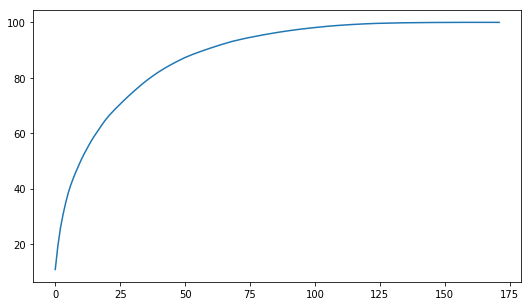

In [56]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

# As we can see from above graph and table that 60 variables explain 90% variance and 80 variables explain 95% variance

In [57]:
# PCA and Logistic Regression
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [58]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

0.8193381960505248

In [59]:
# Checking on Test Data
y_pred = pipeline.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm); print_dashes_and_ln();

print("Accuracy Score ==> {}".format(round(accuracy_score(y_test,y_pred),2))); print_dashes_and_ln();
print("AUC Score ==> {}".format(round(roc_auc_score(y_test,y_pred),2))); print_dashes_and_ln();

TP = (confusion_matrix(y_test,y_pred))[0][0]
FP = (confusion_matrix(y_test,y_pred))[0][1]
FN = (confusion_matrix(y_test,y_pred))[1][0]
TN = (confusion_matrix(y_test,y_pred))[1][1]
print("Not-Churn Accuracy Rate:(Specificity) ==> {}".format(round(TP/(TP+FP),3))); print_dashes_and_ln();
print("Churn Accuracy Rate:(Sensitivity) ==> {}".format(round(TN/(TN+FN),3))); print_dashes_and_ln();

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC Area: ", round(roc_auc_score(y_test, y_pred_prob),3)); print_dashes_and_ln();


[[5628 1220]
 [ 118  529]]
---------------------------------------------------------------------------------------------------- 

Accuracy Score ==> 0.82
---------------------------------------------------------------------------------------------------- 

AUC Score ==> 0.82
---------------------------------------------------------------------------------------------------- 

Not-Churn Accuracy Rate:(Specificity) ==> 0.822
---------------------------------------------------------------------------------------------------- 

Churn Accuracy Rate:(Sensitivity) ==> 0.818
---------------------------------------------------------------------------------------------------- 

AUC Area:  0.891
---------------------------------------------------------------------------------------------------- 



In [60]:
# Hyperparameter tuning PCA and Logistic Regression
# Checing class imbalance
y_train.value_counts()/y_train.shape


0   0.91
1   0.09
Name: churn, dtype: float64

In [61]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [62]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  3.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight={0: ...enalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [63]:
# cross validation results
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0            3.23          0.11             0.07            0.01   
1            4.75          0.22             0.08            0.01   
2            4.25          0.41             0.08            0.02   
3            5.23          0.32             0.09            0.01   
4            3.69          0.14             0.07            0.01   
5            5.01          0.27             0.09            0.01   
6            4.02          0.39             0.07            0.01   
7            5.54          0.27             0.09            0.01   
8            4.02          0.26             0.07            0.00   
9            5.48          0.47             0.09            0.01   
10           3.98          0.23             0.07            0.00   
11           5.66          0.37             0.08            0.01   
12           3.98          0.27             0.07            0.01   
13           6.39          1.11             0.08            0.01   
14           4.01          0.26             0.08            0.01   
15           5.75          0.54             0.09            0.01   
16           4.22          0.61             0.08            0.01   
17           6.17          1.10             0.09            0.01   
18           4.13          0.14             0.07            0.01   
19           5.67          0.19             0.08            0.01   
20           4.22          0.50             0.08            0.00   
21           7.17          2.05             0.08            0.01   
22           3.90          0.05             0.08            0.02   
23           6.53          0.58             0.08            0.02   
24           4.70          0.40             0.09            0.01   
25           7.81          2.67             0.09            0.01   
26           4.05          0.33             0.08            0.01   
27           5.96          0.64             0.08            0.01   
28           4.15          0.88             0.07            0.00   
29           8.31          4.31             0.09            0.01   
30           4.23          0.28             0.09            0.03   
31           5.73          1.22             0.07            0.03   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0               0.10                      l1                      60   
1               0.10                      l1                      80   
2               0.10                      l2                      60   
3               0.10                      l2                      80   
4               0.50                      l1                      60   
5               0.50                      l1                      80   
6               0.50                      l2                      60   
7               0.50                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [64]:
# print best hyperparameters
print("Best AUC: ", model.best_score_); print_dashes_and_ln();
print("Best hyperparameters: ", model.best_params_); print_dashes_and_ln();

Best AUC:  0.8950745515992631
---------------------------------------------------------------------------------------------------- 

Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 80}
---------------------------------------------------------------------------------------------------- 



In [65]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm); print_dashes_and_ln();

print("Accuracy Score ==> {}".format(round(accuracy_score(y_test,y_pred),2))); print_dashes_and_ln();
print("AUC Score ==> {}".format(round(roc_auc_score(y_test,y_pred),2))); print_dashes_and_ln();

TP = (confusion_matrix(y_test,y_pred))[0][0]
FP = (confusion_matrix(y_test,y_pred))[0][1]
FN = (confusion_matrix(y_test,y_pred))[1][0]
TN = (confusion_matrix(y_test,y_pred))[1][1]
print("Not-Churn Accuracy Rate:(Specificity) ==> {}".format(round(TP/(TP+FP),3))); print_dashes_and_ln();
print("Churn Accuracy Rate:(Sensitivity) ==> {}".format(round(TN/(TN+FN),3))); print_dashes_and_ln();

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC Area: ", round(roc_auc_score(y_test, y_pred_prob),3)); print_dashes_and_ln();
    

[[5797 1051]
 [ 131  516]]
---------------------------------------------------------------------------------------------------- 

Accuracy Score ==> 0.84
---------------------------------------------------------------------------------------------------- 

AUC Score ==> 0.82
---------------------------------------------------------------------------------------------------- 

Not-Churn Accuracy Rate:(Specificity) ==> 0.847
---------------------------------------------------------------------------------------------------- 

Churn Accuracy Rate:(Sensitivity) ==> 0.798
---------------------------------------------------------------------------------------------------- 

AUC Area:  0.898
---------------------------------------------------------------------------------------------------- 



In [66]:
# Now we will check this with Random Forest

# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [67]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [68]:
# print best hyperparameters
print("Best AUC: ", model.best_score_); print_dashes_and_ln();
print("Best hyperparameters: ", model.best_params_); print_dashes_and_ln();

Best AUC:  0.8893364138357964
---------------------------------------------------------------------------------------------------- 

Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}
---------------------------------------------------------------------------------------------------- 



In [69]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm); print_dashes_and_ln();


print("Accuracy Score ==> {}".format(round(accuracy_score(y_test,y_pred),2))); print_dashes_and_ln();
print("AUC Score ==> {}".format(round(roc_auc_score(y_test,y_pred),2))); print_dashes_and_ln();

TP = (confusion_matrix(y_test,y_pred))[0][0]
FP = (confusion_matrix(y_test,y_pred))[0][1]
FN = (confusion_matrix(y_test,y_pred))[1][0]
TN = (confusion_matrix(y_test,y_pred))[1][1]
print("Not-Churn Accuracy Rate:(Specificity) ==> {}".format(round(TP/(TP+FP),3))); print_dashes_and_ln();
print("Churn Accuracy Rate:(Sensitivity) ==> {}".format(round(TN/(TN+FN),3))); print_dashes_and_ln();

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC Area: ", round(roc_auc_score(y_test, y_pred_prob),3)); print_dashes_and_ln();


[[6746  102]
 [ 344  303]]
---------------------------------------------------------------------------------------------------- 

Accuracy Score ==> 0.94
---------------------------------------------------------------------------------------------------- 

AUC Score ==> 0.73
---------------------------------------------------------------------------------------------------- 

Not-Churn Accuracy Rate:(Specificity) ==> 0.985
---------------------------------------------------------------------------------------------------- 

Churn Accuracy Rate:(Sensitivity) ==> 0.468
---------------------------------------------------------------------------------------------------- 

AUC Area:  0.883
---------------------------------------------------------------------------------------------------- 



# Sensitivity for this model is around 46% which is very less. we are going with PCA along with logisitic model. 

In [70]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))   
# number of variables to consider to split each node
print(max_features); print_dashes_and_ln();
rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13
---------------------------------------------------------------------------------------------------- 



In [71]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.4s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features=13,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=True, random_state=4,
            verbose=1, warm_start=False)

In [72]:
# OOB score
rf_model.oob_score_

0.9397793986835082

In [73]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm); print_dashes_and_ln();


print("Accuracy Score ==> {}".format(round(accuracy_score(y_test,y_pred),2))); print_dashes_and_ln();
print("AUC Score ==> {}".format(round(roc_auc_score(y_test,y_pred),2))); print_dashes_and_ln();

TP = (confusion_matrix(y_test,y_pred))[0][0]
FP = (confusion_matrix(y_test,y_pred))[0][1]
FN = (confusion_matrix(y_test,y_pred))[1][0]
TN = (confusion_matrix(y_test,y_pred))[1][1]
print("Not-Churn Accuracy Rate:(Specificity) ==> {}".format(round(TP/(TP+FP),3))); print_dashes_and_ln();
print("Churn Accuracy Rate:(Sensitivity) ==> {}".format(round(TN/(TN+FN),3))); print_dashes_and_ln();

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC Area: ", round(roc_auc_score(y_test, y_pred_prob),3)); print_dashes_and_ln();

[[6746  102]
 [ 344  303]]
---------------------------------------------------------------------------------------------------- 

Accuracy Score ==> 0.94
---------------------------------------------------------------------------------------------------- 

AUC Score ==> 0.73
---------------------------------------------------------------------------------------------------- 

Not-Churn Accuracy Rate:(Specificity) ==> 0.985
---------------------------------------------------------------------------------------------------- 

Churn Accuracy Rate:(Sensitivity) ==> 0.468
---------------------------------------------------------------------------------------------------- 

AUC Area:  0.883
---------------------------------------------------------------------------------------------------- 



In [74]:
# Feature Inportance
# predictors
features = rawchurn.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum()); print_dashes_and_ln();
feature_importance

Sum of importance= 99.99999999999999
---------------------------------------------------------------------------------------------------- 



variables  importance_percentage
0           total_ic_mou_8                   5.38
1             loc_ic_mou_8                   4.58
2         loc_ic_t2m_mou_8                   4.26
3             loc_og_mou_8                   3.26
4                   arpu_8                   2.97
5      total_rech_amt_diff                   2.90
6           total_og_mou_8                   2.87
7       last_day_rch_amt_8                   2.72
8            roam_og_mou_8                   2.41
9         loc_og_t2m_mou_8                   2.39
10        loc_og_t2t_mou_8                   2.33
11        loc_ic_t2t_mou_8                   1.93
12           roam_ic_mou_8                   1.91
13        roam_og_mou_diff                   1.82
14               arpu_diff                   1.70
15         std_og_mou_diff                   1.58
16            std_ic_mou_8                   1.58
17       total_ic_mou_diff                   1.56
18        total_rech_amt_8                   1.49
19        roam_ic_mou_diff                   1.49
20            offnet_mou_8                   1.48
21          max_rech_amt_8                   1.46
22       total_og_mou_diff                   1.43
23     total_rech_num_diff                   1.24
24         offnet_mou_diff                   1.19
25         loc_ic_mou_diff                   1.06
26          onnet_mou_diff                   0.91
27      av_rech_amt_data_8                   0.82
28         loc_og_mou_diff                   0.81
29             onnet_mou_8                   0.81
30        loc_og_t2f_mou_8                   0.80
31                     aon                   0.77
32         max_rech_data_8                   0.70
33       max_rech_amt_diff                   0.68
34        std_ic_t2m_mou_8                   0.63
35        loc_ic_t2f_mou_8                   0.62
36         std_ic_mou_diff                   0.59
37                  arpu_6                   0.56
38                  arpu_7                   0.55
39            loc_ic_mou_7                   0.54
40        total_rech_amt_7                   0.52
41        loc_ic_t2t_mou_7                   0.51
42            loc_og_mou_7                   0.51
43        std_og_t2m_mou_8                   0.50
44         spl_og_mou_diff                   0.50
45            std_og_mou_7                   0.49
46            std_og_mou_8                   0.49
47          total_og_mou_7                   0.48
48            loc_ic_mou_6                   0.47
49        loc_ic_t2m_mou_6                   0.47
50        loc_ic_t2m_mou_7                   0.47
51        total_rech_amt_6                   0.46
52            loc_og_mou_6                   0.46
53          total_ic_mou_6                   0.46
54          total_ic_mou_7                   0.46
55            offnet_mou_6                   0.46
56        loc_og_t2m_mou_7                   0.44
57          max_rech_amt_6                   0.43
58        loc_og_t2t_mou_7                   0.42
59        loc_og_t2m_mou_6                   0.42
60             onnet_mou_6                   0.41
61        total_rech_num_7                   0.41
62        loc_og_t2t_mou_6                   0.41
63            offnet_mou_7                   0.41
64             vol_2g_mb_8                   0.40
65             onnet_mou_7                   0.40
66           roam_og_mou_7                   0.40
67        std_og_t2m_mou_7                   0.39
68            std_og_mou_6                   0.39
69        total_rech_num_8                   0.39
70   av_rech_amt_data_diff                   0.39
71           roam_ic_mou_7                   0.39
72        total_rech_num_6                   0.38
73        loc_ic_t2t_mou_6                   0.38
74          total_og_mou_6                   0.37
75      max_rech_data_diff                   0.37
76            std_ic_mou_7                   0.36
77        std_ic_t2m_mou_6                   0.34
78          vol_2g_mb_diff                   0.34
79        loc_ic_

In [75]:
# Extarcting top 25 Features

top_n = 25
top_features = feature_importance.variables[0:top_n]

<Figure size 1080x1080 with 0 Axes>

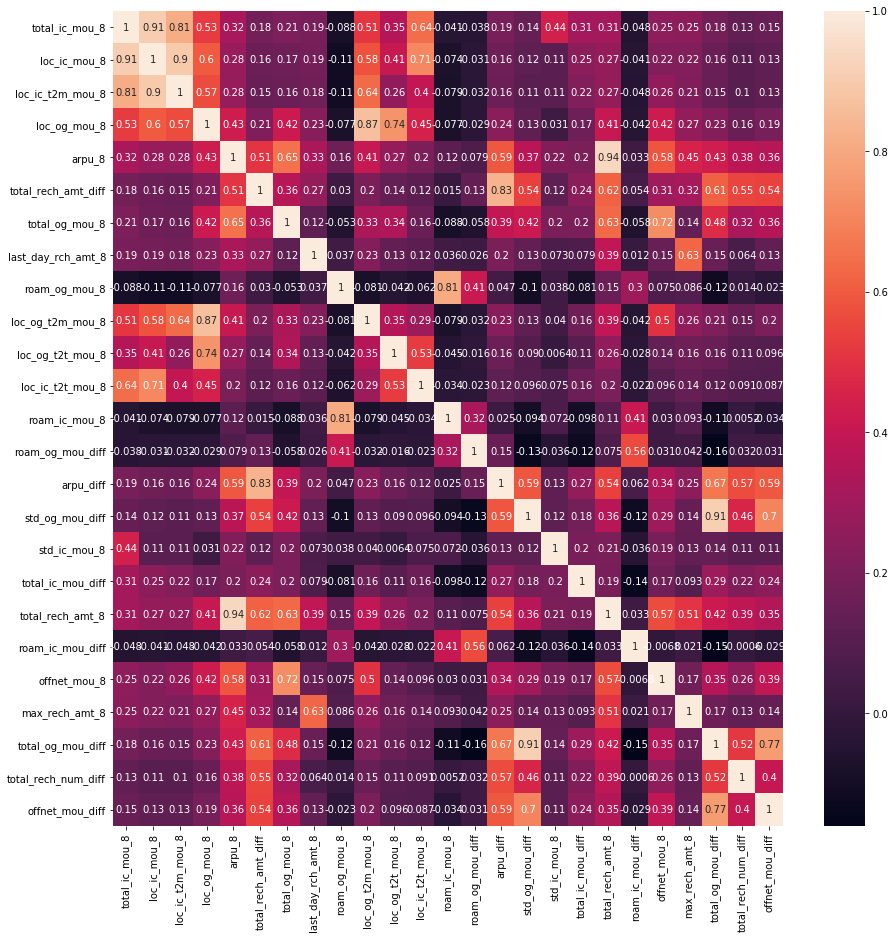

In [76]:
# heat map
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (15,15))      
sns.heatmap(data=X_train[top_features].corr(),annot = True)

In [77]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'std_og_mou_diff']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [78]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [79]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [80]:
# print best hyperparameters
print("Best AUC: ", model.best_score_); print_dashes_and_ln();
print("Best hyperparameters: ", model.best_params_); print_dashes_and_ln();

Best AUC:  0.8695163004621838
---------------------------------------------------------------------------------------------------- 

Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l1'}
---------------------------------------------------------------------------------------------------- 



In [81]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm); print_dashes_and_ln();


print("Accuracy Score ==> {}".format(round(accuracy_score(y_test,y_pred),2))); print_dashes_and_ln();
print("AUC Score ==> {}".format(round(roc_auc_score(y_test,y_pred),2))); print_dashes_and_ln();

TP = (confusion_matrix(y_test,y_pred))[0][0]
FP = (confusion_matrix(y_test,y_pred))[0][1]
FN = (confusion_matrix(y_test,y_pred))[1][0]
TN = (confusion_matrix(y_test,y_pred))[1][1]
print("Not-Churn Accuracy Rate:(Specificity) ==> {}".format(round(TP/(TP+FP),3))); print_dashes_and_ln();
print("Churn Accuracy Rate:(Sensitivity) ==> {}".format(round(TN/(TN+FN),3))); print_dashes_and_ln();

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC Area: ", round(roc_auc_score(y_test, y_pred_prob),3))

[[5776 1072]
 [ 136  511]]
---------------------------------------------------------------------------------------------------- 

Accuracy Score ==> 0.84
---------------------------------------------------------------------------------------------------- 

AUC Score ==> 0.82
---------------------------------------------------------------------------------------------------- 

Not-Churn Accuracy Rate:(Specificity) ==> 0.843
---------------------------------------------------------------------------------------------------- 

Churn Accuracy Rate:(Sensitivity) ==> 0.79
---------------------------------------------------------------------------------------------------- 

AUC Area:  0.873


In [82]:
logistic_model = model.best_estimator_.named_steps['logistic']
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [83]:
# coefficients
coefficients = logistic_model.coef_.reshape((8, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [84]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  total_ic_mou_8  total_rech_amt_diff  total_og_mou_8  arpu_8  \
0      -1.29           -1.33                -0.66           -0.12   -0.40   

   roam_ic_mou_8  roam_og_mou_8  std_ic_mou_8  std_og_mou_diff  
0          -0.00           0.35          0.23            -0.23

# Summary

1. Minutes of Usage on 8th Month for outgoing and incoming calls (Mostly Roaming/Local/STD) and 
2. Recharge amount difference

# Recommendation
1. If the total usage as measured by the total minutes of usage and the recharge amount in 7th and 8th month is declining as compared to 6th month, then it is likely that such a customer will churn. 
2. If the Total Outgoing Minutes of Usage falls below 220 minutes in the 8th, We recommend the telecom provider to reach out to such customers and provide them with lockin offers that will prevent their churn.
3. Telecom provider should also focus on STD and roaming rates